# Introduction to Python for Environmental Science - Gridded Data

## Overview
In this notebook we are going to look at data models for a different sort of data compared to the **tabular data**, called  **gridded data**. One definition of girdded data is as follows:

>Gridded data is two-dimensional data representing an atmospheric or oceanic parameter along an evenly spaced matrix. For the matrix to be useful, ancillary information about the grid must also be known. This ancillary information, along with the gridded data, is collectively called a grid object.

[quote source](https://www.ssec.wisc.edu/mcidas/doc/prog_man/2015/access-3.html#:~:text=Gridded%20data%20is%20two%2Ddimensional,collectively%20called%20a%20grid%20object)

In this notebook we will be looking at manipulating multi-dimensional array manually, and then an  easier way to work with gridded data models using an equivalent libraries for gridded data to pandas for tabular data.

## Tutorial


Each dimension in the grid or array is a dimension of the measurement, of whihc there can be more than 2, for example latitude, longitude and time. One thing the definition does mention is the metadata about the grid, example linking specific values in the array to specific latitudes/longitudes in the real-world. This is the meta data which together with the data forms our data model for gridded data.

Each grid usually represents a separate physical phenomena, for example wind or temperature, unlike tabular data where typically different columns represented different phenomena.

### Key terms
* *gridded* - weather parameters mapped onto a regular geographical grid e.g. output from any of the Numerical Weather Prediction model or radar. Gridded data is useful when you need to analyse the weather across a wide area.
* *dimension* - The size of each axis of the array. For example in an image, you have two dimensions, the vertical and horizontal. Typical dimensions in environmental data include latitude, longitude, altitude and time.
* *resolution* - climate models split the Earth's atmosphere and ocean into a finite number of grid boxes (similar to the pixels on a digital camera) - the higher the number of grid boxes, the higher (or finer) the spatial resolution. For example, a model with a horizontal resolution of 1 degree would have 360 (latitude) x 180 (longitude) = 64,800 grid boxes. The height of the atmosphere, and the depth of the ocean are split into distinct layers - so the number of these layers determines the vertical resolution of the model.

[Met Office Data Glossary](https://www.metoffice.gov.uk/services/data/business-data/glossary)





## Exercises 

### Getting the sample data

The sample data for use with this notebook is available from Zenodo.

* UKV selected variables November 2019 - High resolution weather data over the United Kingdom [zenodo archive](https://doi.org/10.5281/zenodo.7101562)
* UKCP RCP85 selected variables for Dec 2065 to Nov 2066 [zenodo archive](https://doi.org/10.5281/zenodo.7101557)

You can download the data using wget, for example
``` bash
wget https://zenodo.org/record/7101563/files/ukv.tgz $HOME/data
wget https://zenodo.org/record/7101557/files/ukcp_rcp85.tgz $HOME/data
``` 

then unzip the data as follows
``` bash
cd $HOME/data/
tar xvzf ukv.tgz
tar xvzf ukcp_rcp85.tgz
```

The notebooks will expect the data in the locations created by those commands. Update the `sample_data_root` variable if you have downloaded and extracted the data to another location.


### Exploring Weather Model data - UKV

UKV is the high-resolution weather forecast model used by the Met Office. Here we will explore some sample data to understand how to work with gridded data like thast from a weather forecast model.

In [8]:
import os
import pathlib

In [39]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas

In [3]:
import iris

In [4]:
import xarray

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
sample_data_root = pathlib.Path(os.environ['HOME']) / 'data'
sample_data_root

PosixPath('/Users/stephen.haddad/data')

In [18]:
ukv_root_dir  = sample_data_root / 'intro_python_ds' / 'ukv'
print(ukv_root_dir.is_dir())

True


In [29]:
ukv_var_list = {p1.stem: p1 for p1 in ukv_root_dir.glob('*')}
list(ukv_var_list.keys())

['t1o5m_min',
 'pmsl_mean',
 'windspeed_mean',
 't1o5m_mean',
 't1o5m_max',
 'windgust_max',
 'rain_mean']

In [28]:
current_var = 't1o5m_max'
current_var

't1o5m_max'

In [52]:
ukv_temp_max = iris.load_cube([str(p1) for p1 in ukv_var_list[current_var].iterdir()])

In [70]:
ukcp_root_dir = sample_data_root / 'ukcp_rcp85'

In [73]:
list(ukcp_root_dir.rglob('*nc'))

[PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/sfcWind/sfcWind_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/psl/psl_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/pr/pr_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/tasmin/tasmin_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc')]

In [75]:
iris.load_cube(str(list(ukcp_root_dir.rglob('*nc'))[0]))

Wind Speed (m s-1),ensemble_member,time,grid_latitude,grid_longitude
Shape,1,360,607,484
Dimension coordinates,,,,
ensemble_member,x,-,-,-
time,-,x,-,-
grid_latitude,-,-,x,-
grid_longitude,-,-,-,x
Auxiliary coordinates,,,,
ensemble_member_id,x,-,-,-
month_number,-,x,-,-
year,-,x,-,-


### Multi-dimensional array in Numpy

In [43]:
ukv_temp_max_array = ukv_temp_max.data
ukv_temp_max_array

masked_array(
  data=[[[289.25   , 289.25   , 289.25   , ..., 289.28125, 289.28125,
          289.23438],
         [289.25   , 289.25   , 289.23438, ..., 289.26562, 289.03125,
          289.0625 ],
         [289.23438, 289.23438, 289.23438, ..., 288.95312, 288.79688,
          288.85938],
         ...,
         [282.70312, 282.70312, 282.70312, ..., 282.51562, 282.48438,
          282.48438],
         [282.71875, 282.71875, 282.71875, ..., 282.5    , 282.5    ,
          282.46875],
         [282.73438, 282.73438, 282.73438, ..., 282.5    , 282.46875,
          282.40625]],

        [[287.39062, 287.40625, 287.42188, ..., 289.     , 288.98438,
          288.9375 ],
         [287.4375 , 287.4375 , 287.40625, ..., 288.98438, 288.67188,
          288.73438],
         [287.4375 , 287.42188, 287.39062, ..., 288.57812, 288.26562,
          288.42188],
         ...,
         [283.28125, 283.29688, 283.29688, ..., 283.14062, 283.14062,
          283.125  ],
         [283.26562, 283.28125, 283.

In [46]:
ukv_temp_max_array.shape

(30, 808, 621)

In [47]:
ukv_temp_max_array[0,:,:]

masked_array(
  data=[[289.25   , 289.25   , 289.25   , ..., 289.28125, 289.28125,
         289.23438],
        [289.25   , 289.25   , 289.23438, ..., 289.26562, 289.03125,
         289.0625 ],
        [289.23438, 289.23438, 289.23438, ..., 288.95312, 288.79688,
         288.85938],
        ...,
        [282.70312, 282.70312, 282.70312, ..., 282.51562, 282.48438,
         282.48438],
        [282.71875, 282.71875, 282.71875, ..., 282.5    , 282.5    ,
         282.46875],
        [282.73438, 282.73438, 282.73438, ..., 282.5    , 282.46875,
         282.40625]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [48]:
ukv_temp_max_array[0,:,:].min(), ukv_temp_max_array[0,:,:].max()

(276.45312, 290.98438)

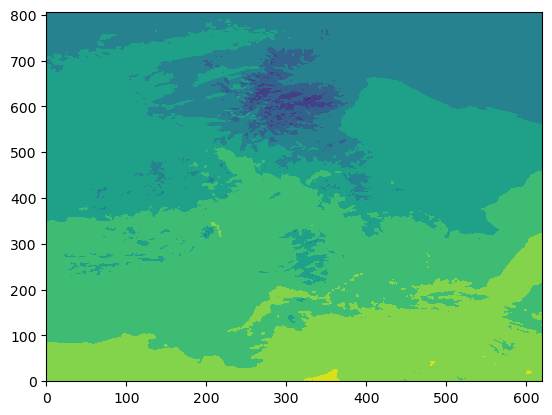

In [50]:
fig1 = matplotlib.pyplot.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.contourf(ukv_temp_max_array[0,:,:])

### Iris and Data Cubes
Metadata so data has physical meaning


In [51]:
ukv_temp_max

<iris 'Cube' of air_temperature / (K) (time: 30; grid_latitude: 808; grid_longitude: 621)>

### Exploring Data Characteristics

In [53]:
ukv_temp_max.coords()

[<DimCoord: time / (hours since 1970-01-01 00:00:00)  [...]+bounds  shape(30,)>,
 <DimCoord: grid_latitude / (degrees)  [-3.757, -3.744, ..., 7.124, 7.137]  shape(808,)>,
 <DimCoord: grid_longitude / (degrees)  [354.942, ...]  shape(621,)>,
 <DimCoord: forecast_period / (hours)  [2.5]+bounds>,
 <DimCoord: height / (m)  [1.5]>,
 <DimCoord: forecast_reference_time / (hours since 1970-01-01 00:00:00)  [...]+bounds  shape(30,)>]

In [55]:
[c1.name() for c1 in ukv_temp_max.coords()]

['time',
 'grid_latitude',
 'grid_longitude',
 'forecast_period',
 'height',
 'forecast_reference_time']

In [57]:
[(c1.points.min(),c1.points.max()) for c1 in ukv_temp_max.coords()]

[(436835.5, 437531.5),
 (-3.7572, 7.1373005),
 (354.9424743652344, 363.3124745823443),
 (2.5, 2.5),
 (1.5, 1.5),
 (436833.0, 437529.0)]

In [67]:
(list(ukv_temp_max.coord('time').cells())[0].point, list(ukv_temp_max.coord('time').cells())[-1].point)

(cftime.DatetimeGregorian(2019, 11, 1, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 30, 11, 30, 0, 0, has_year_zero=False))

### Gridded data - Dealing with projections


### Extracting subsets

In [69]:
devon_coords = {
    'latitude': (50.2, 51.3),
    'longitude': (-4.6,-2.8),
}

In [ ]:
devon_temp_max = iris.extract(iris.Constraint(
    latitude=lambda cell: devon_coords['latitude'][0] < cell.point <
))

In [ ]:
# subset by location
# subset by times


### Summary Statistics

In [ ]:
# global stats

In [ ]:
# aggregate statisistic using auxillary coordinates (group by)

### Visualising Data

In [33]:
# plot map§
# talk about projections

In [ ]:
# plot time series

In [ ]:
# plot histogram

## Alternative tools - Xarray

In [ ]:
# load data

In [ ]:
# data array and data set

In [32]:
# subset

In [ ]:
# plot map§

In [ ]:
# plot time series

In [31]:
# differences between iris and xarray - cf compliant metadata

### Exploring Climate Model Data - UK Climate Projections

### Examples of use

#### Model Data
See session 3 notebooks on examples of gridded data, such as:
* [Met Office Weather Simulation Data](https://www.metoffice.gov.uk/services/government/defence-and-security/models)
* [UK Climate Projections](https://www.metoffice.gov.uk/research/approach/collaboration/ukcp) - Forecasts of UK climate conditions for the 21st century.
* [Global Climnate Data from CMIP6](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6)
  * [MoreCMIP6 info from Carbon Brief](https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained/)
* [ERA5 Renalsysis Data](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5) - A global dataset of oservations, processed (or *renanalysed*) using a physic-based model to merge the many different observation modes into a single physically realistic dataset.
  * [ERA5 data on AWS](https://registry.opendata.aws/ecmwf-era5/)
  
#### Satelite Data
Similar but slightly different is data from satellites or other sorts of images. 
* [Met Office Info on Satellite Imagery](https://www.metoffice.gov.uk/research/weather/satellite-applications/satellite-imagery)
* [EUMetSat Image Viewer](https://view.eumetsat.int/productviewer?v=default)

### Data Statement

### References

* [Met Office Data Glossary](https://www.metoffice.gov.uk/services/data/business-data/glossary)